# Outline

 - [Directed Graph API](#Directed-Graph-API)
 - [DirectedDFS](#DirectedDFS)
 - [Directed Cycle](#Directed-Cycle)
 - [Topological Order](#Topological-Order)
 - [Reverse Graph](#Reverse-Graph)
 - [Strong Component](#Strong-Component)

# Directed Graph API

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


class node():
    def __init__(self, name):
        self.name = name
        self.neighbors = [] # list of nodes (not just names)
        
    def neighbors_name(self):
        """
        info about neighbors names
        """
        return [node_s.name for node_s in self.neighbors]
      
        
class digraph():
    def __init__(self, elist):
        """
            self.nodes is a dictionary
                key   : node name
                value : node class
        """
        self.elist = elist
        self.node_names = list(set([s for s,t in elist] + [t for s,t in elist]))
        self.nodes = {s:node(s) for s in self.node_names}
        
        self.create_graph()
      
    def add_edge(self, s,t):
        """directed Edge"""
        self.nodes[s].neighbors.append(self.nodes[t])
    
    def create_graph(self):
        for s,t in self.elist:
             self.add_edge(s,t)
                
    def info(self):
        return {s:node_s.neighbors_name() for s,node_s in self.nodes.items()}
    
    def draw(self, color = 'lightblue'):
        """
            Usage of networkx for visualisation
        """
        G = nx.DiGraph()
        G.add_edges_from(self.elist)
        plt.figure(figsize=(20,10))
        nx.draw(G, node_size=500, node_color=color, with_labels=True)
             

{'D': [],
 'C': ['D', 'B'],
 'B': [],
 'A': ['B', 'C', 'E'],
 'F': ['D'],
 'E': ['D']}

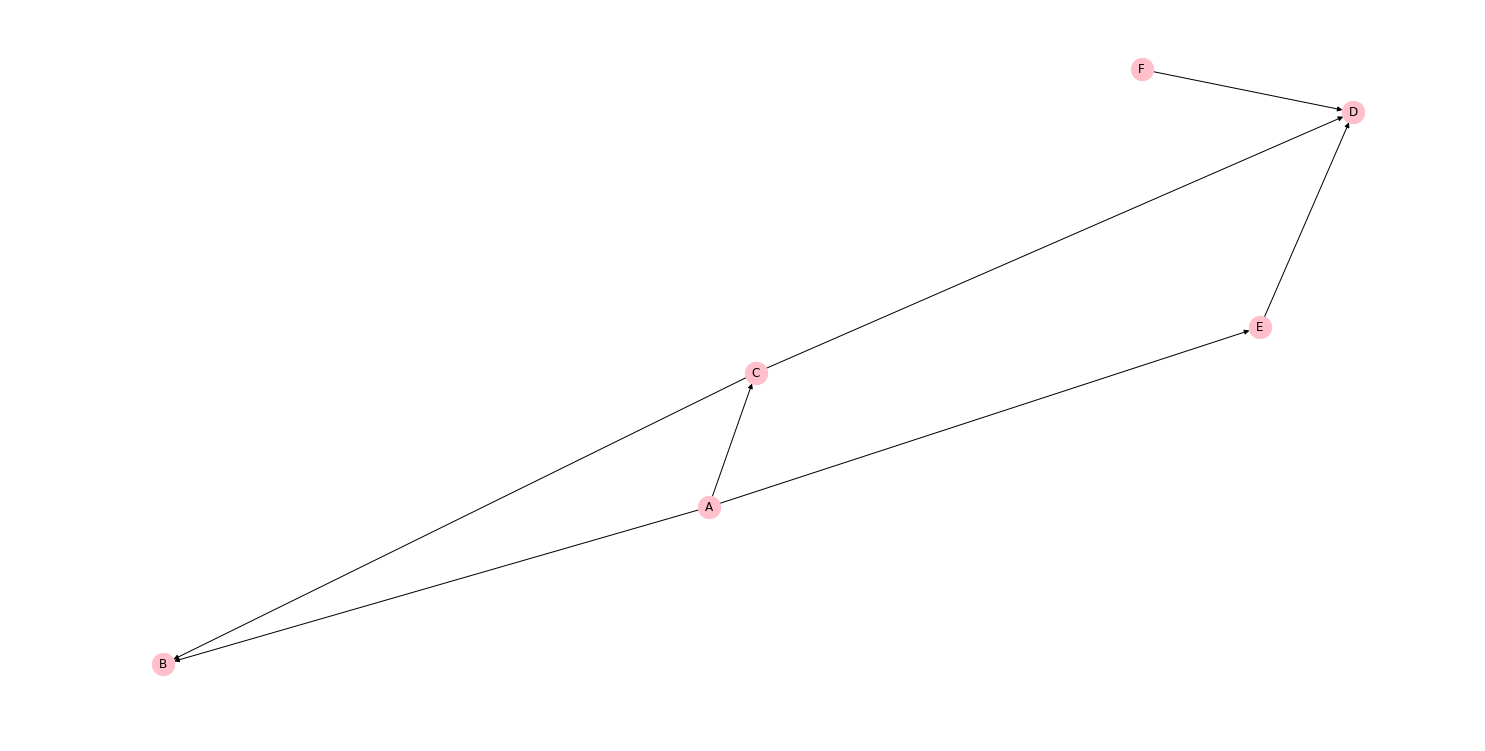

In [2]:
elist = [('A', 'B'), ('A', 'C'), ('C', 'D'), ('C', 'B'), ('E', 'D'), ('F', 'D'), ('A', 'E')]
G = digraph(elist)
G.draw('pink')
G.info()

# DirectedDFS

In [3]:
class DirectedDFS():
    def __init__(self, G):
        self.G = G
        self.visited = {node_name: False for node_name in G.node_names}
        self.prev = {node_name: None for node_name in G.node_names}
        self.traversal = []
        
    def dfs(self, sname):
        self.visited[sname] = True
        self.traversal.append(sname)
        for neighbor in self.G.nodes[sname].neighbors:
            if not self.visited[neighbor.name]:
                self.prev[neighbor.name] = sname
                self.dfs(neighbor.name)

In [4]:
dfs = DirectedDFS(G)
dfs.dfs('A')

In [5]:
dfs.visited

{'D': True, 'C': True, 'B': True, 'A': True, 'F': False, 'E': True}

In [6]:
dfs.prev

{'D': 'C', 'C': 'A', 'B': 'A', 'A': None, 'F': None, 'E': 'A'}

In [7]:
dfs.traversal

['A', 'B', 'C', 'D', 'E']

# Directed Cycle

In [8]:
class DirectedCycle():
    def __init__(self, G):
        self.visited = {node_name: False for node_name in G.node_names}
        self.prev = {node_name: None for node_name in G.node_names}
        
        self.cycle = []
        self.onStack = {node_name: False for node_name in G.node_names}
        
        for node_name in G.node_names:
            if not self.visited[node_name]:
                self.dfs(node_name)
    
    def hasCycle(self):
        return len(self.cycle) > 0 
    
    def dfs(self, sname):
        self.visited[sname] = True
        self.onStack[sname] = True
        
        for neighbor in G.nodes[sname].neighbors:
            if self.hasCycle(): return
            elif not self.visited[neighbor.name]:
                self.prev[neighbor.name] = sname
                self.dfs(neighbor.name)
            elif self.onStack[neighbor.name]: # cycle detected
                self.cycle = []
                x_name = sname
                print("# cycle detected")
                while x_name != neighbor.name:
                    print(x_name)
                    self.cycle.append(x_name)
                    x_name = self.prev[x_name]
                print(neighbor.name)
                print(sname)
                self.cycle.append(neighbor.name)
                self.cycle.append(sname)
                
                self.cycle.reverse()
        self.onStack[sname] = False
        

In [9]:
str_elist = """
4 2
3 2
6 0
0 1
2 0
11 12
12 9
9 10
9 11
8 9
10 12
11 4
4 3
3 5
7 8
8 7
5 4
0 5
6 4
6 9
7 6
2 3
"""

{'9': ['10', '11'],
 '6': ['0', '4', '9'],
 '10': ['12'],
 '2': ['0', '3'],
 '12': ['9'],
 '7': ['8', '6'],
 '8': ['9', '7'],
 '5': ['4'],
 '11': ['12', '4'],
 '3': ['2', '5'],
 '1': [],
 '0': ['1', '5'],
 '4': ['2', '3']}

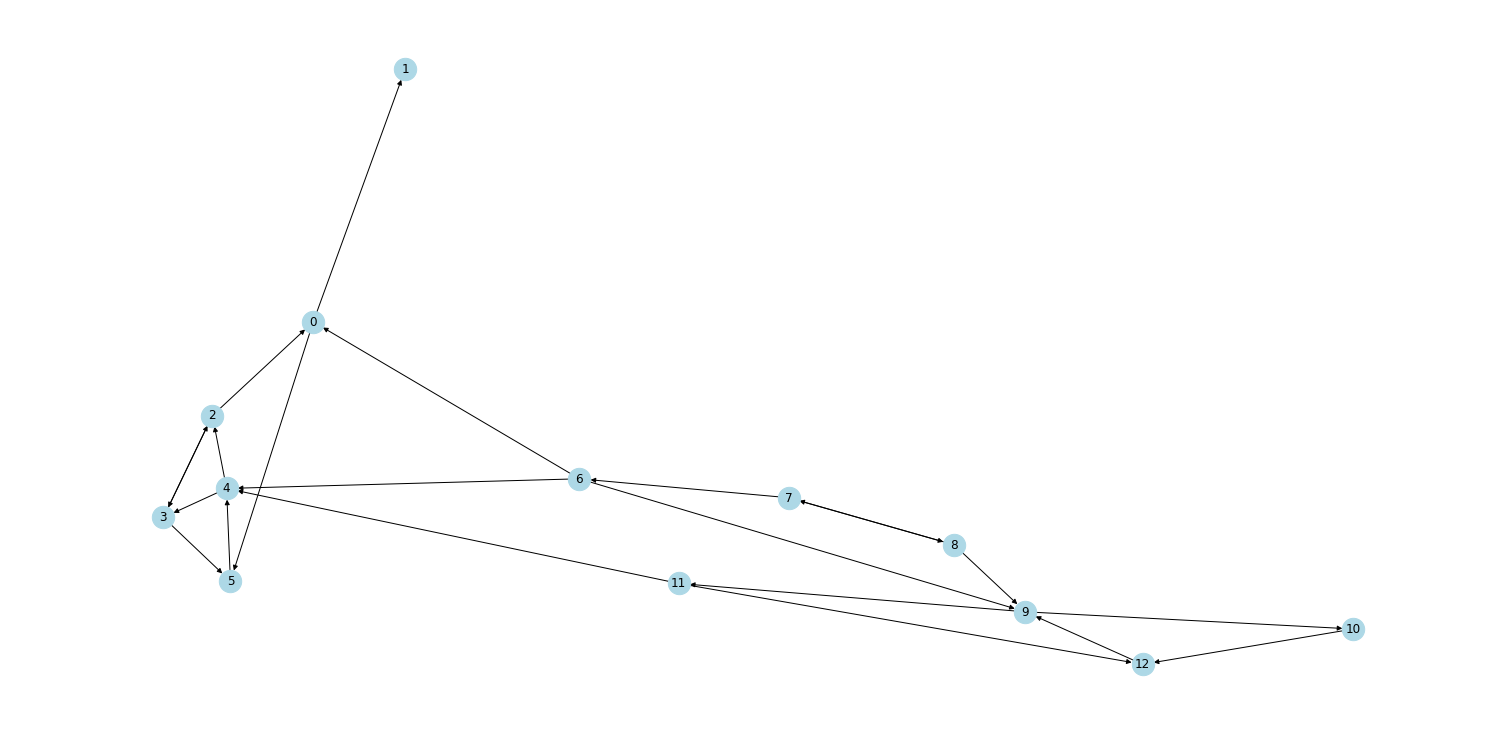

In [10]:
elist = [tuple(line.split(' ')) for line in str_elist.split('\n') if line != '']
G = digraph(elist)
G.draw('lightblue')
G.info()

In [11]:
cyco = DirectedCycle(G)

# cycle detected
12
10
9
12


In [12]:
cyco.cycle

['12', '9', '10', '12']

In [13]:
cyco.hasCycle()

True

# Topological Order

In [14]:
class TopologialOrder():
    def __init__(self, G):
        self.G = G
        self.visited = {node_name: False for node_name in G.node_names}
        self.postOrder = []
        
        for node_name in self.G.node_names:
            if not self.visited[node_name]:
                self.dfs(node_name)
        self.postOrder.reverse()
                
    def dfs(self, sname):
        self.visited[sname] = True
        
        for neighbor in self.G.nodes[sname].neighbors:
            if not self.visited[neighbor.name]:
                self.dfs(neighbor.name)
        self.postOrder.append(sname)

{'6': ['4', '0'],
 '2': [],
 '5': ['2'],
 '3': ['6', '5', '4', '2'],
 '1': ['4'],
 '0': ['5', '2', '1'],
 '4': []}

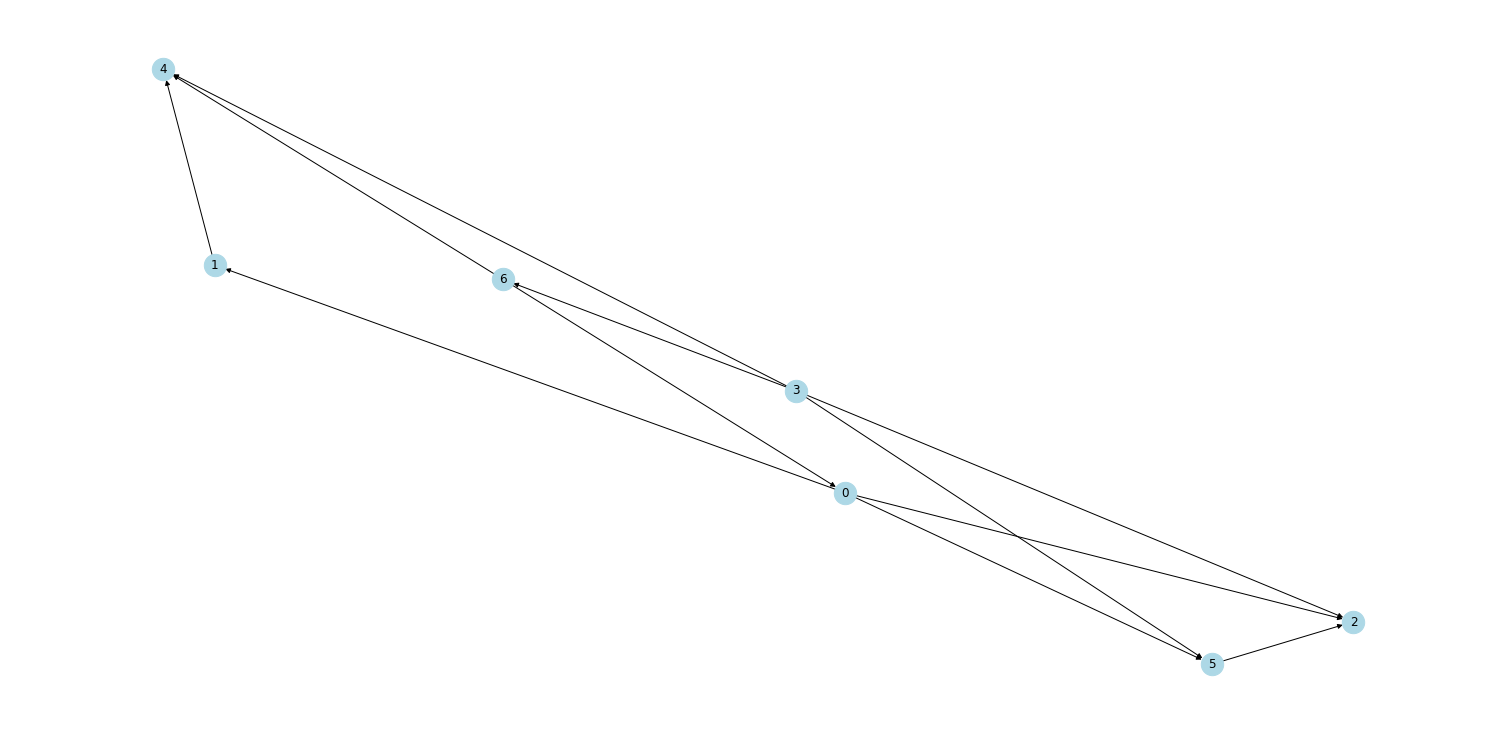

In [15]:
str_elist = """
0 5
0 2
0 1
3 6
3 5
3 4
5 2
6 4
6 0
3 2
1 4
"""
elist = [tuple(line.split(' ')) for line in str_elist.split('\n') if line != '']
G = digraph(elist)
G.draw('lightblue')
G.info()

In [16]:
topo = TopologialOrder(G)

In [17]:
topo.postOrder

['3', '6', '0', '1', '5', '2', '4']

# Reverse Graph

In [18]:
G.info()

{'6': ['4', '0'],
 '2': [],
 '5': ['2'],
 '3': ['6', '5', '4', '2'],
 '1': ['4'],
 '0': ['5', '2', '1'],
 '4': []}

In [19]:
G.elist

[('0', '5'),
 ('0', '2'),
 ('0', '1'),
 ('3', '6'),
 ('3', '5'),
 ('3', '4'),
 ('5', '2'),
 ('6', '4'),
 ('6', '0'),
 ('3', '2'),
 ('1', '4')]

In [20]:
reversed_elist = [(t,s) for s, t in  G.elist]
reversed_elist

[('5', '0'),
 ('2', '0'),
 ('1', '0'),
 ('6', '3'),
 ('5', '3'),
 ('4', '3'),
 ('2', '5'),
 ('4', '6'),
 ('0', '6'),
 ('2', '3'),
 ('4', '1')]

{'6': ['3'],
 '2': ['0', '5', '3'],
 '5': ['0', '3'],
 '3': [],
 '1': ['0'],
 '0': ['6'],
 '4': ['3', '6', '1']}

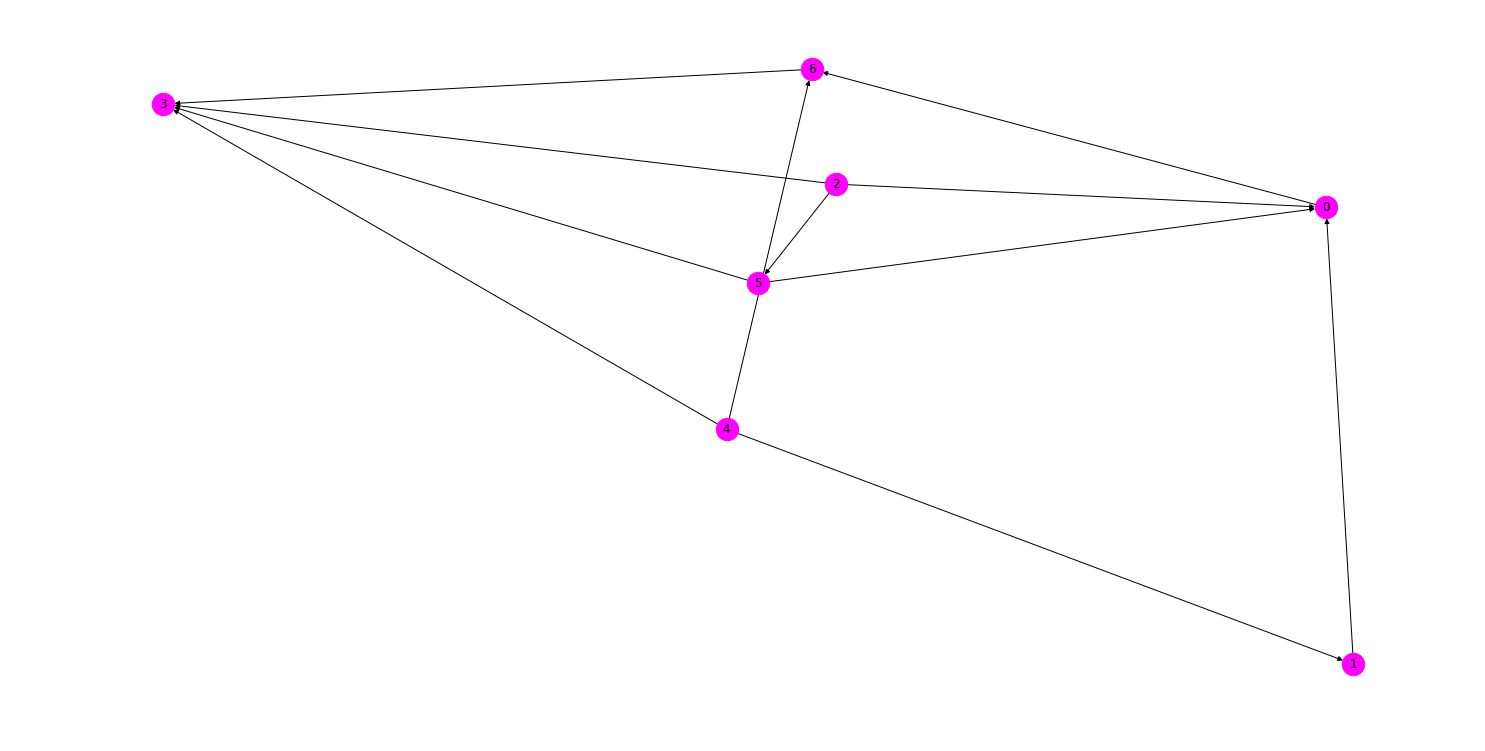

In [21]:
GR = digraph(reversed_elist)
GR.draw('magenta')
GR.info()

In [22]:
class reversedGraph(): 
    @staticmethod
    def reverse(G):
        reversed_elist = [(t,s) for s, t in  G.elist]
        return digraph(reversed_elist)

In [23]:
R = reversedGraph().reverse(G)

In [24]:
R.info()

{'6': ['3'],
 '2': ['0', '5', '3'],
 '5': ['0', '3'],
 '3': [],
 '1': ['0'],
 '0': ['6'],
 '4': ['3', '6', '1']}

In [25]:
G.info()

{'6': ['4', '0'],
 '2': [],
 '5': ['2'],
 '3': ['6', '5', '4', '2'],
 '1': ['4'],
 '0': ['5', '2', '1'],
 '4': []}

# Strong Component

## Kosaraju-Sharir Algorithm
 - Compute reverse postoreder in R (reversed graph of G)
 - Run DFS in G, in that order
 

In [26]:
class SCC():   
    def __init__(self, G):
        self.G = G
        self.visited = {node_name: False for node_name in G.node_names}
        self.id = {}
        self.count = 0
        
    def SCC(self):
        R = reversedGraph().reverse(self.G)
        topo = TopologialOrder(R)
        postOrder = topo.postOrder
        #postOrder.reverse()
        
        for node_name in postOrder:
            if not self.visited[node_name]:
                self.dfs(node_name)
                self.count += 1
                
        
    def dfs(self, s_name):
        self.visited[s_name] = True
        self.id[s_name] = self.count
        
        for neighbor in self.G.nodes[s_name].neighbors:
            if not self.visited[neighbor.name]:
                self.dfs(neighbor.name)

In [27]:
str_elist = """
4 2
2 3
3 2
6 0
0 1
2 0
11 12
12 9
9 10
9 11
7 9
10 12
11 4
4 3
3 5
6 8
8 6
5 4
0 5
6 4
6 9
7 6
"""

{'9': ['10', '11'],
 '6': ['0', '8', '4', '9'],
 '10': ['12'],
 '2': ['3', '0'],
 '12': ['9'],
 '7': ['9', '6'],
 '8': ['6'],
 '5': ['4'],
 '11': ['12', '4'],
 '3': ['2', '5'],
 '1': [],
 '0': ['1', '5'],
 '4': ['2', '3']}

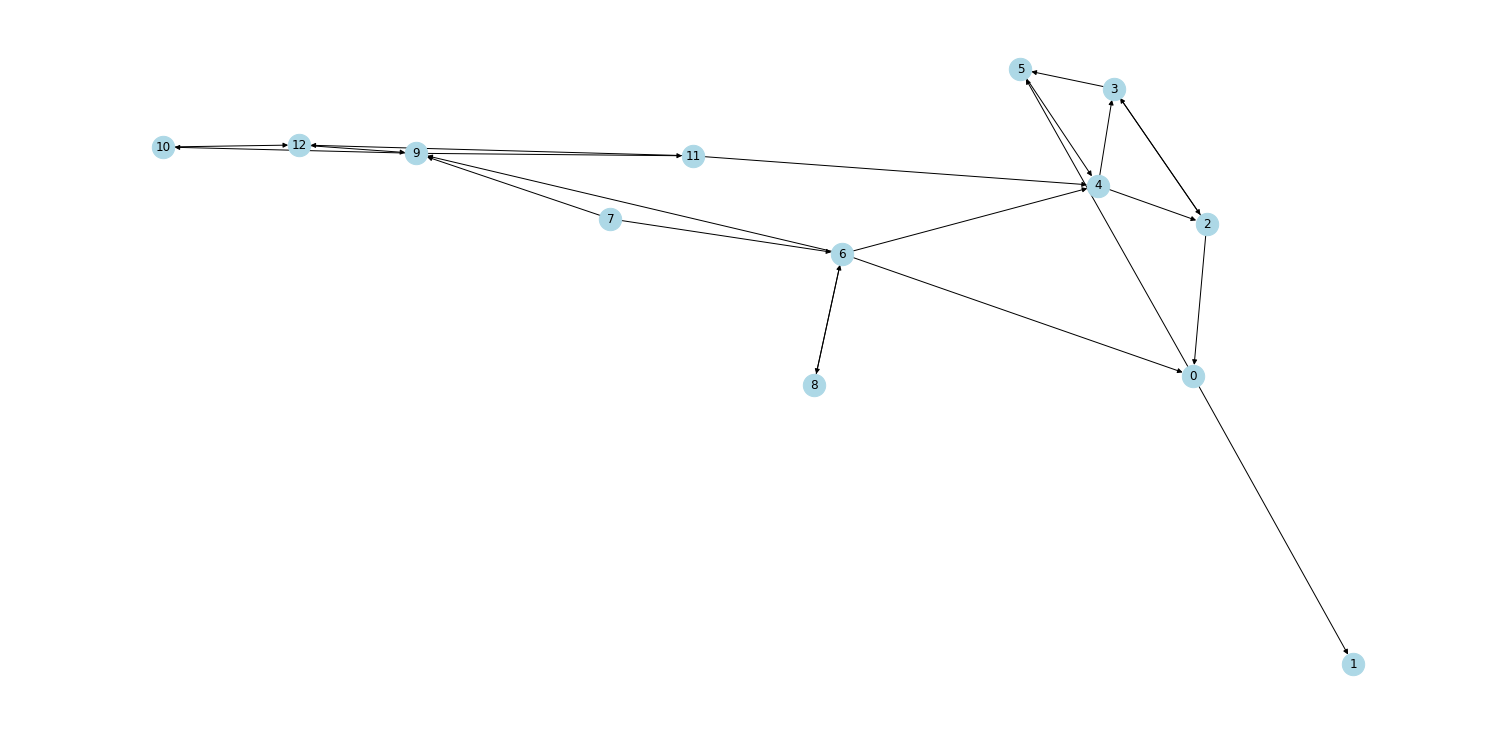

In [28]:
elist = [tuple(line.split(' ')) for line in str_elist.split('\n') if line != '']
G = digraph(elist)
G.draw('lightblue')
G.info()

In [29]:
scc = SCC(G)
scc.SCC()

In [30]:
scc.id

{'1': 0,
 '2': 1,
 '3': 1,
 '5': 1,
 '4': 1,
 '0': 1,
 '9': 2,
 '10': 2,
 '12': 2,
 '11': 2,
 '6': 3,
 '8': 3,
 '7': 4}

In [31]:
scc.count

5

In [32]:
R = reversedGraph().reverse(G)
topo = TopologialOrder(R)
postOrder = topo.postOrder
#postOrder.reverse()
postOrder

['1', '2', '4', '5', '0', '3', '9', '6', '8', '7', '12', '10', '11']

In [33]:
scc.G.info()

{'9': ['10', '11'],
 '6': ['0', '8', '4', '9'],
 '10': ['12'],
 '2': ['3', '0'],
 '12': ['9'],
 '7': ['9', '6'],
 '8': ['6'],
 '5': ['4'],
 '11': ['12', '4'],
 '3': ['2', '5'],
 '1': [],
 '0': ['1', '5'],
 '4': ['2', '3']}

In [34]:
len(scc.G.elist)

22